In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

In [2]:
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataset = randn(25)
dataset

array([ 1.5805362 ,  0.2801215 , -2.51141249,  2.43387835,  0.91593462,
       -1.1200122 , -0.06274861, -1.10100974, -1.15385982, -0.01472229,
       -2.67145055,  0.90422669,  1.4601835 ,  1.41700464,  0.09272164,
       -1.38535705, -2.02846021,  0.18634177, -1.69508791, -1.47122216,
       -0.61104064,  1.15659264, -0.43035363,  1.79827635, -0.37065751])

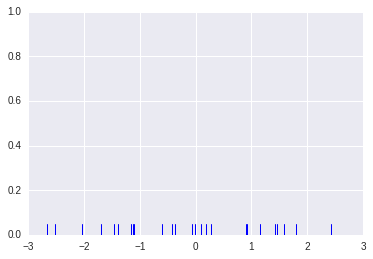

In [4]:
sns.rugplot(dataset)

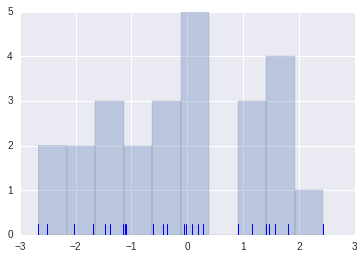

In [5]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

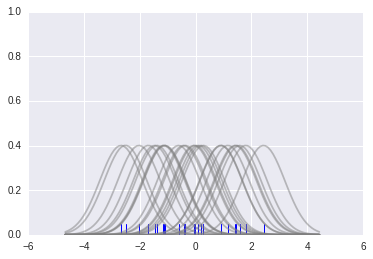

In [6]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5) / (3*len(dataset)))**0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*0.4
    
    plt.plot(x_axis, kernel, color='grey',alpha=0.5)
    
plt.ylim(0,1)

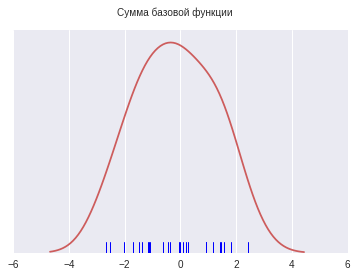

In [7]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Сумма базовой функции")

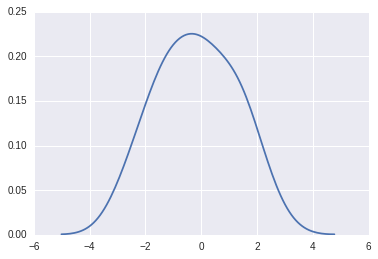

In [8]:
sns.kdeplot(dataset)

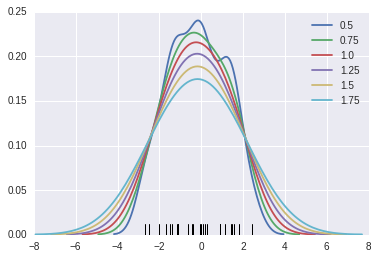

In [9]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

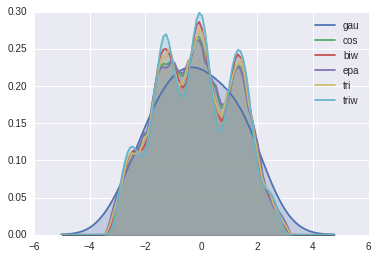

In [10]:
kernel_options = ['gau','cos','biw','epa','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

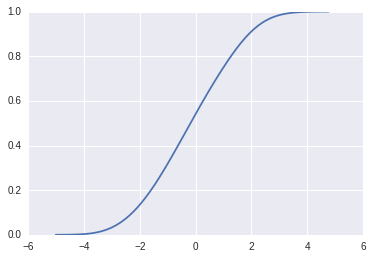

In [11]:
sns.kdeplot(dataset,cumulative=True)

In [12]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

In [13]:
dataset2

array([[ -0.404165  ,  -0.13520644],
       [ -1.0630302 ,   1.82503368],
       [ -0.96592373,  11.85296417],
       ..., 
       [ -0.77576572,  -5.66338837],
       [ -0.31010353,  -2.06714046],
       [  0.22108104,  -0.19592337]])

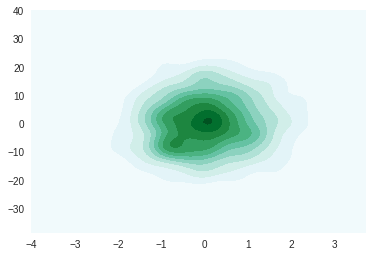

In [14]:
df = DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(df,shade=True)

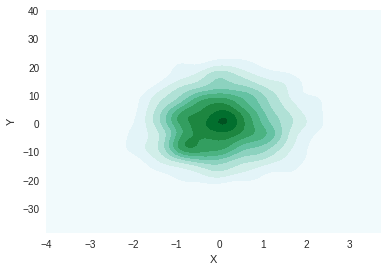

In [15]:
sns.kdeplot(df.X,df.Y,shade=True)

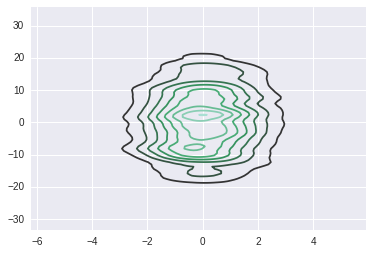

In [16]:
sns.kdeplot(df,bw=1)

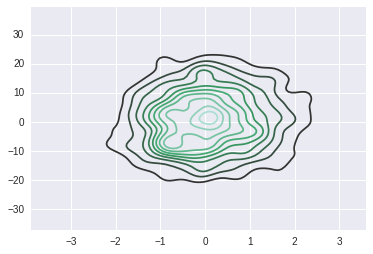

In [17]:
sns.kdeplot(df,bw='silverman')

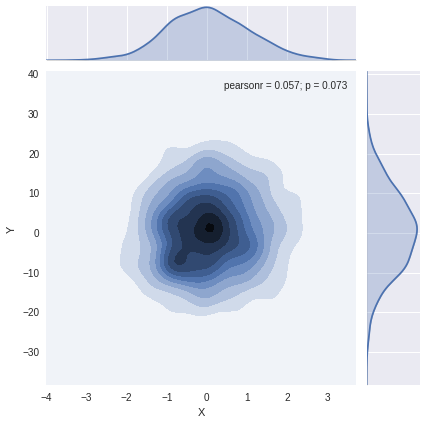

In [18]:
sns.jointplot('X','Y',df,kind='kde')